<a href="https://colab.research.google.com/github/yujin512/text_causal_inference/blob/master/Explore%20nltk%20corpora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [3]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories = genre)
)

In [4]:
cfd.conditions()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [7]:
print(cfd['news'].most_common(20))

[('the', 5580), (',', 5188), ('.', 4030), ('of', 2849), ('and', 2146), ('to', 2116), ('a', 1993), ('in', 1893), ('for', 943), ('The', 806), ('that', 802), ('``', 732), ('is', 732), ('was', 717), ("''", 702), ('on', 657), ('at', 598), ('with', 545), ('be', 526), ('by', 497)]


In [14]:
cfd.tabulate(conditions = ['news', 'romance'], samples = ['I','love', 'you'], cumulative = True)

           I love  you 
   news  179  182  237 
romance  951  983 1439 


In [17]:
# Which days are most noteworthy / romantic? 
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cfd.tabulate(conditions = ['news', 'romance'], samples = days)

           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 


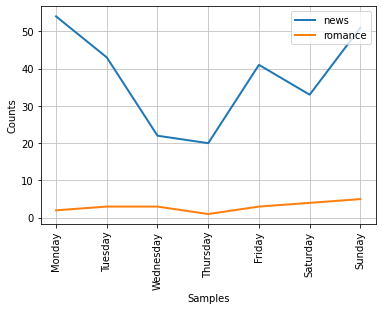

In [18]:
cfd.plot(conditions = ['news', 'romance'], samples = days)

The most frequent days in the news are Monday and Sunday. Does Monday Blue cause more newsworthy events? 

### 2.4 Generating Random Text with Bigrams


In [23]:
sent1 = brown.sents('cn10')[0]
list(nltk.bigrams(sent1))

[('The', 'Brannon'),
 ('Brannon', 'outfit'),
 ('outfit', '--'),
 ('--', 'known'),
 ('known', 'as'),
 ('as', 'the'),
 ('the', 'Slash-B'),
 ('Slash-B', 'because'),
 ('because', 'of'),
 ('of', 'its'),
 ('its', 'brand'),
 ('brand', '--'),
 ('--', 'reached'),
 ('reached', 'Hondo'),
 ('Hondo', 'Creek'),
 ('Creek', 'before'),
 ('before', 'sundown'),
 ('sundown', '.')]

In [34]:
nltk.download("genesis")
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!


In [48]:
import random
def generate_model(cfdist, word, num=15):
  for i in range(num):
    print(word, end=' ')
    word = random.choice(list(cfd[word].keys()))


In [49]:
generate_model(cfd, 'land')

land ? bless me swear unto Mamre the heat , Some evil for my progenitors 

In [50]:
generate_model(cfd, 'God')

God and Pharaoh took her elder was Timna . Cursed be willing to Abram departed 

In [52]:
generate_model(cfd, 'Abraham')

Abraham shall enlarge Japheth . My lord Esau is bought he kissed him away the 

In [53]:
generate_model(cfd, 'He')

He if not cast him Benjamin with Abel . Gather yourselves under , four kings 

## Writing functions

4.1 Wordlist Opera

In [55]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [56]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [59]:
def unusual_words(txt):
  txt_vocab = set(w.lower() for w in txt if w.isalpha())
  english_vocab = set(w.lower() for w in nltk.corpus.words.words())
  unusual = txt_vocab - english_vocab
  return sorted(unusual)

unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:10]

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations']

In [63]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')[:20]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [65]:
def content_fraction(text):
  stopwords = nltk.corpus.stopwords.words('english')
  content = [w for w in text if w.lower() not in stopwords]
  return len(content)/len(text)
content_fraction(nltk.corpus.gutenberg.words('austen-sense.txt'))

0.5285429733853195

In [66]:
puzzle_letters = nltk.FreqDist('egivrvonl')
puzzle_letters

FreqDist({'e': 1, 'g': 1, 'i': 1, 'l': 1, 'n': 1, 'o': 1, 'r': 1, 'v': 2})

In [68]:
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6
 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters]

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

In [71]:
[w for w in wordlist if nltk.FreqDist(w) <= puzzle_letters][:5]

['e', 'ego', 'egol', 'el', 'eloign']

In [73]:
nltk.download('names')
names = nltk.corpus.names
names.fileids()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


['female.txt', 'male.txt']

In [74]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')

In [76]:
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names`.words(fileid)
)

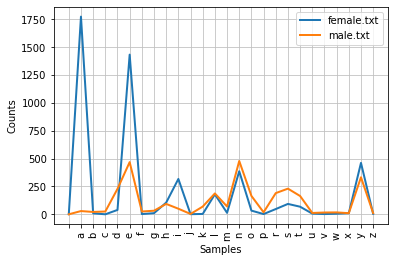

In [77]:
cfd.plot()

As expected, names that end in the letters `a` or `e` are almost exclusively considered male names. More male names than female names end in the letter `s`.

In [83]:
nltk.download("cmudict")
entries = nltk.corpus.cmudict.entries()

[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [85]:
for word, pron in entries:
  if len(pron) == 3:
    ph1, ph2, ph3 = pron
    if ph1 == 'P' and ph3 == 'T':
      print(word, ph2, end=' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

In [99]:
for entry in entries:
  if entry[0] == 'electronics':
    syllable = entry[1]

In [100]:
syllable

['IH0', 'L', 'EH2', 'K', 'T', 'R', 'AA1', 'N', 'IH0', 'K', 'S']

In [104]:
syllable[-4:][1]

'IH0'

In [102]:
[word for word, pron in entries if pron[-4:] == syllable[-4:]]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics',
 'conics',
 'cryogenics',
 'cynics',
 'diasonics',
 "dominic's",
 'ebonics',
 'electronics',
 "electronics'",
 "endotronics'",
 'endotronics',
 'enix',
 'environics',
 'ethnics',
 'eugenics',
 'fibronics',
 'flextronics',
 'harmonics',
 'hispanics',
 'histrionics',
 'identics',
 'ionics',
 'kibbutzniks',
 'lasersonics',
 'lumonics',
 'mannix',
 'mechanics',
 "mechanics'",
 'microelectronics',
 'minix',
 'minnix',
 'mnemonics',
 'mnemonics',
 'molonicks',
 'mullenix',
 'mullenix',
 'mullinix',
 'mulnix',
 "munich's",
 'nucleonics',
 'onyx',
 'organics',
 "panic's",
 'panics',
 'penix',
 'pennix',
 'personics',
 'phenix',
 "philharmonic's",
 'phoenix',
 'phonics',
 'photronics',
 'pinnix',
 'plantronics',
 'pyrotechnics',
 'refuseniks',
 "resnick's",
 'respironics',
 'sconnix',
 'siliconix',
 'skolniks',
 'sonics',
 'sputniks',
 'technics

In [105]:
def stress(pron):
  return [char for phone in pron for char in phone if char.isdigit()]

In [107]:
[w for w, pron in entries if stress(pron)== ['0', '1', '0', '2', '0']]

['abbreviated',
 'abbreviated',
 'abbreviating',
 'accelerated',
 'accelerating',
 'accelerator',
 'accelerators',
 'accentuated',
 'accentuating',
 'accommodated',
 'accommodating',
 'accommodative',
 'accumulated',
 'accumulating',
 'accumulative',
 'accumulator',
 'accumulators',
 'accusatory',
 'adenovirus',
 'adjudicated',
 'adjudicating',
 'administrating',
 'administrative',
 'administrator',
 "administrators'",
 "administrator's",
 'administrators',
 'adulterated',
 'adventurism',
 'adventurism',
 'affiliated',
 'affiliated',
 "affiliated's",
 'affiliating',
 'alleviated',
 'alleviated',
 'alleviating',
 'alliteration',
 'alliterative',
 'amalgamated',
 "amalgamated's",
 'amalgamating',
 'ameliorated',
 'ameridata',
 'amoxicillin',
 'anachronism',
 'anachronisms',
 'annihilated',
 'annihilating',
 'antagonism',
 'antagonisms',
 'antagonizing',
 'anticipated',
 'anticipated',
 'anticipating',
 'apologizes',
 'apologizing',
 'apothecary',
 'appreciated',
 'appreciating',
 'apprec

In [112]:
p3 = [(pron[0]+'-'+pron[2], word) for (word, pron) in entries if pron[0] == 'P' and len(pron) == 3]

In [110]:
p3 = [(pron[0]+'-'+pron[2], word) [1]
       for (word, pron) in entries
       if pron[0] == 'P' and len(pron) == 3]

In [117]:
p3[:10]

[('P-P', 'paap'),
 ('P-P', 'paape'),
 ('P-R', 'paar'),
 ('P-SH', 'paasch'),
 ('P-K', 'pac'),
 ('P-S', 'pace'),
 ('P-K', 'pack'),
 ('P-D', 'pad'),
 ('P-K', 'paek'),
 ('P-TH', 'paeth')]

In [116]:
cfd = nltk.ConditionalFreqDist(p3)
for template in sorted(cfd.conditions()):
  if len(cfd[template]) > 10:
    words = sorted(cfd[template])
    wordstring = ' '.join(words)
    print(template, wordstring[:20] + '...')

P-CH patch pautsch peach ...
P-K pac pack paek paik p...
P-L pahl pail paille pal...
P-N paign pain paine pan...
P-P paap paape pap pape ...
P-R paar pair par pare p...
P-S pace pass pasts peac...
P-T pait pat pate patt p...
P-UW1 peru peugh pew plew ...
P-Z p's p.'s p.s pais pa...


In [118]:
prondict = nltk.corpus.cmudict.dict()

In [119]:
prondict['fire']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

In [120]:
text = ['natural', 'language', 'processing']
[ph for w in text for ph in prondict[w][0]]

['N',
 'AE1',
 'CH',
 'ER0',
 'AH0',
 'L',
 'L',
 'AE1',
 'NG',
 'G',
 'W',
 'AH0',
 'JH',
 'P',
 'R',
 'AA1',
 'S',
 'EH0',
 'S',
 'IH0',
 'NG']

In [122]:
nltk.download('swadesh')
from nltk.corpus import swadesh
swadesh.fileids()

[nltk_data] Downloading package swadesh to /root/nltk_data...
[nltk_data]   Unzipping corpora/swadesh.zip.


['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [127]:
# 200 most common words in English
swadesh.words('en')

['I',
 'you (singular), thou',
 'he',
 'we',
 'you (plural)',
 'they',
 'this',
 'that',
 'here',
 'there',
 'who',
 'what',
 'where',
 'when',
 'how',
 'not',
 'all',
 'many',
 'some',
 'few',
 'other',
 'one',
 'two',
 'three',
 'four',
 'five',
 'big',
 'long',
 'wide',
 'thick',
 'heavy',
 'small',
 'short',
 'narrow',
 'thin',
 'woman',
 'man (adult male)',
 'man (human being)',
 'child',
 'wife',
 'husband',
 'mother',
 'father',
 'animal',
 'fish',
 'bird',
 'dog',
 'louse',
 'snake',
 'worm',
 'tree',
 'forest',
 'stick',
 'fruit',
 'seed',
 'leaf',
 'root',
 'bark (from tree)',
 'flower',
 'grass',
 'rope',
 'skin',
 'meat',
 'blood',
 'bone',
 'fat (noun)',
 'egg',
 'horn',
 'tail',
 'feather',
 'hair',
 'head',
 'ear',
 'eye',
 'nose',
 'mouth',
 'tooth',
 'tongue',
 'fingernail',
 'foot',
 'leg',
 'knee',
 'hand',
 'wing',
 'belly',
 'guts',
 'neck',
 'back',
 'breast',
 'heart',
 'liver',
 'drink',
 'eat',
 'bite',
 'suck',
 'spit',
 'vomit',
 'blow',
 'breathe',
 'laugh',

In [128]:
fr2en = swadesh.entries(['fr', 'en'])
fr2en

[('je', 'I'),
 ('tu, vous', 'you (singular), thou'),
 ('il', 'he'),
 ('nous', 'we'),
 ('vous', 'you (plural)'),
 ('ils, elles', 'they'),
 ('ceci', 'this'),
 ('cela', 'that'),
 ('ici', 'here'),
 ('là', 'there'),
 ('qui', 'who'),
 ('quoi', 'what'),
 ('où', 'where'),
 ('quand', 'when'),
 ('comment', 'how'),
 ('ne...pas', 'not'),
 ('tout', 'all'),
 ('plusieurs', 'many'),
 ('quelques', 'some'),
 ('peu', 'few'),
 ('autre', 'other'),
 ('un', 'one'),
 ('deux', 'two'),
 ('trois', 'three'),
 ('quatre', 'four'),
 ('cinq', 'five'),
 ('grand', 'big'),
 ('long', 'long'),
 ('large', 'wide'),
 ('épais', 'thick'),
 ('lourd', 'heavy'),
 ('petit', 'small'),
 ('court', 'short'),
 ('étroit', 'narrow'),
 ('mince', 'thin'),
 ('femme', 'woman'),
 ('homme', 'man (adult male)'),
 ('homme', 'man (human being)'),
 ('enfant', 'child'),
 ('femme, épouse', 'wife'),
 ('mari, époux', 'husband'),
 ('mère', 'mother'),
 ('père', 'father'),
 ('animal', 'animal'),
 ('poisson', 'fish'),
 ('oiseau', 'bird'),
 ('chien', 'dog'

In [129]:
translate = dict(fr2en)
translate['nom']

'name'

In [130]:
de2en = swadesh.entries(['de', 'en'])
es2en = swadesh.entries(['es', 'en'])
translate.update(dict(de2en))
translate.update(dict(es2en))

In [131]:
translate['Hund']

'dog'

In [132]:
# compare Germanic and Romance languages
languages = ['en', 'de', 'fr', 'es', 'nl', 'la']
for i in [139, 140, 141, 142]:
  print(swadesh.entries(languages)[i])

('say', 'sagen', 'dire', 'decir', 'zeggen', 'dicere')
('sing', 'singen', 'chanter', 'cantar', 'zingen', 'canere')
('play', 'spielen', 'jouer', 'jugar', 'spelen', 'ludere')
('float', 'schweben', 'flotter', 'flotar', 'zweven', 'fluctuare')


In [143]:
nltk.download('toolbox')
from nltk.corpus import toolbox
toolbox.fileids()

[nltk_data] Downloading package toolbox to /root/nltk_data...
[nltk_data]   Package toolbox is already up-to-date!


[]

In [145]:
toolbox.entries('rotokas.dic')

[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

## Wordnet
Wordnet is a semantically-oriented dictionary of English


In [146]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
wn.synsets('fly')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


[Synset('fly.n.01'),
 Synset('tent-fly.n.01'),
 Synset('fly.n.03'),
 Synset('fly.n.04'),
 Synset('fly.n.05'),
 Synset('fly.v.01'),
 Synset('fly.v.02'),
 Synset('fly.v.03'),
 Synset('fly.v.04'),
 Synset('fly.v.05'),
 Synset('fly.v.06'),
 Synset('fly.v.07'),
 Synset('fly.v.08'),
 Synset('fly.v.09'),
 Synset('fly.v.10'),
 Synset('flee.v.01'),
 Synset('fly.v.12'),
 Synset('fly.v.13'),
 Synset('vanish.v.05'),
 Synset('fly.s.01')]

In [150]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [151]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [152]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [155]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]

Synset('ambulance.n.01')

In [156]:
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

In [158]:
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [159]:
paths = motorcar.hypernym_paths()

In [160]:
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [162]:
[synset.name() for synset in paths[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [163]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [164]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [165]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [166]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [169]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
right.lowest_common_hypernyms(minke)[0].min_depth()

14

In [168]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [170]:
right.path_similarity(minke)

0.25

In [171]:
right.path_similarity(tortoise)

0.07692307692307693